In [ ]:
# Install dependencies as needed:
# pip install kagglehub

import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load the stellar classification dataset from Kaggle
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "fedesoriano/stellar-classification-dataset-sdss17",
    "star_classification.csv"
)

: 

In [ ]:
df.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


Checking if there are any null values

In [ ]:
df.isnull().sum()

,0
obj_ID,0
alpha,0
delta,0
u,0
g,0
r,0
i,0
z,0
run_ID,0
rerun_ID,0


Checking the sample size of the dataset

In [ ]:
df['class'].value_counts()

,count
class,
GALAXY,59445
STAR,21594
QSO,18961


Visualization of histogram of the relevant attributes for preprocessing

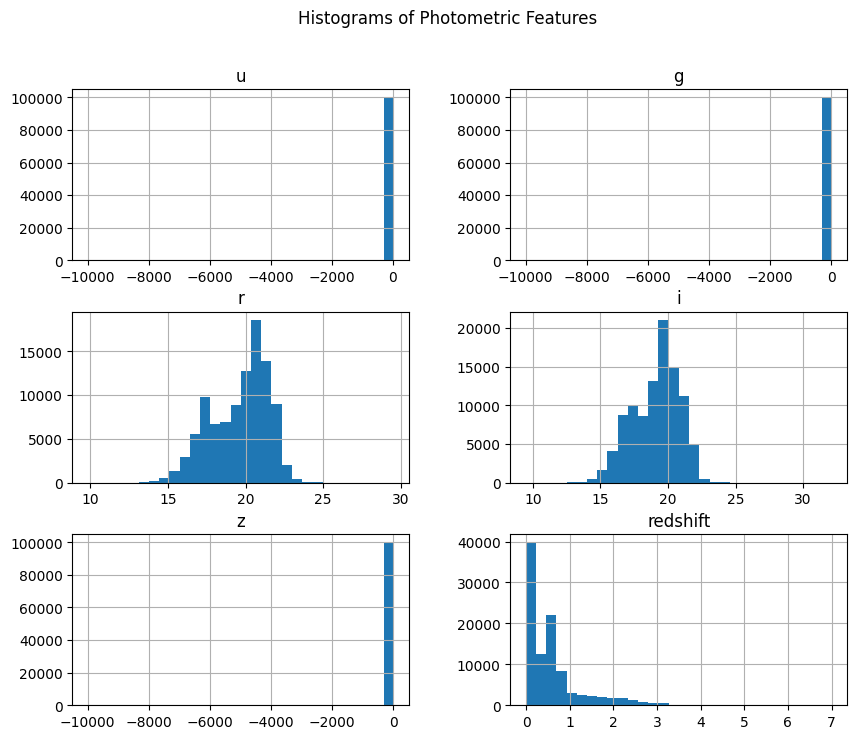

In [ ]:
import matplotlib.pyplot as plt
df[['u', 'g', 'r', 'i', 'z', 'redshift']].hist(bins=30, figsize=(10, 8))
plt.suptitle("Histograms of Photometric Features")
plt.show()

Encoding the class into binary numbers, along with dropping all unecessary attributes, and finally getting rid of extreme outliers within the chosen attributes

In [ ]:
mdf['class'] = df['class'].map({'GALAXY': 0, 'QSO': 1, 'STAR': 2})

df = df.drop(['alpha', 'delta', 'obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'MJD', 'plate', 'fiber_ID'], axis=1)

df = df[~((df['u'] < -1000) | (df['g'] < -1000) | (df['z'] < -1000))]

Updated histograms with evenly distributed attribute values

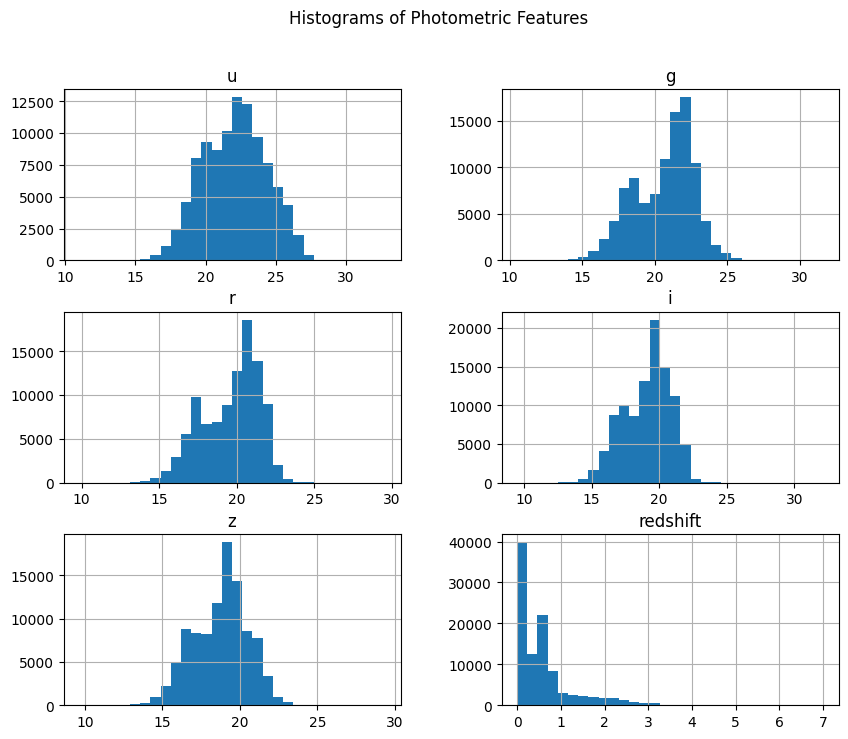

In [ ]:
df[['u', 'g', 'r', 'i', 'z', 'redshift']].hist(bins=30, figsize=(10, 8))
plt.suptitle("Histograms of Photometric Features")
plt.show()

Updated dataset head

In [ ]:
df.head(10)

,u,g,r,i,z,class,redshift
0,23.87882,22.27530,20.39501,19.16573,18.79371,0,0.634794
1,24.77759,22.83188,22.58444,21.16812,21.61427,0,0.779136
2,25.26307,22.66389,20.60976,19.34857,18.94827,0,0.644195
3,22.13682,23.77656,21.61162,20.50454,19.25010,0,0.932346
4,19.43718,17.58028,16.49747,15.97711,15.54461,0,0.116123
5,23.48827,23.33776,21.32195,20.25615,19.54544,1,1.424659
6,21.46973,21.17624,20.92829,20.60826,20.42573,1,0.586455
7,22.24979,22.02172,20.34126,19.48794,18.84999,0,0.477009
8,24.40286,22.35669,20.61032,19.46490,18.95852,0,0.660012
9,21.74669,20.03493,19.17553,18.81823,18.65422,2,-0.000008


Measures of spread and central tendency for data exploration

In [ ]:
import numpy as np


# Measures of central tendency
print("Mean:\n", df.mean())
print("Median:\n", df.median())
print("Mode:\n", df.mode().iloc[0])  # Mode can have multiple values, so take first row

# Measures of spread
print("Range:\n", df.max() - df.min())
print("Variance:\n", df.var())
print("Standard Deviation:\n", df.std())
print("Quartiles:\n", df.quantile([0.25, 0.5, 0.75]))
print("Percentiles:\n", np.percentile(df, [10, 25, 50, 75, 90]))

Mean:
 u           22.080679
g           20.631583
r           19.645777
i           19.084865
z           18.768988
class        0.621476
redshift     0.576667
dtype: float64
Median:
 u           22.179140
g           21.099930
r           20.125310
i           19.405150
z           19.004600
class        0.000000
redshift     0.424176
dtype: float64
Mode:
 u           24.63465
g           25.11438
r           24.80203
i           24.36180
z           22.82690
class        0.00000
redshift     0.00000
Name: 0, dtype: float64
Range:
 u           21.785160
g           21.104040
r           19.749790
i           22.671567
z           19.771407
class        2.000000
redshift     7.021216
dtype: float64
Variance:
 u           5.067309
g           4.150934
r           3.440146
i           3.090214
z           3.118692
class       0.667115
redshift    0.533935
dtype: float64
Standard Deviation:
 u           2.251068
g           2.037384
r           1.854763
i           1.757900
z           1

Pairplot for visualization and for determining relationships between attributes

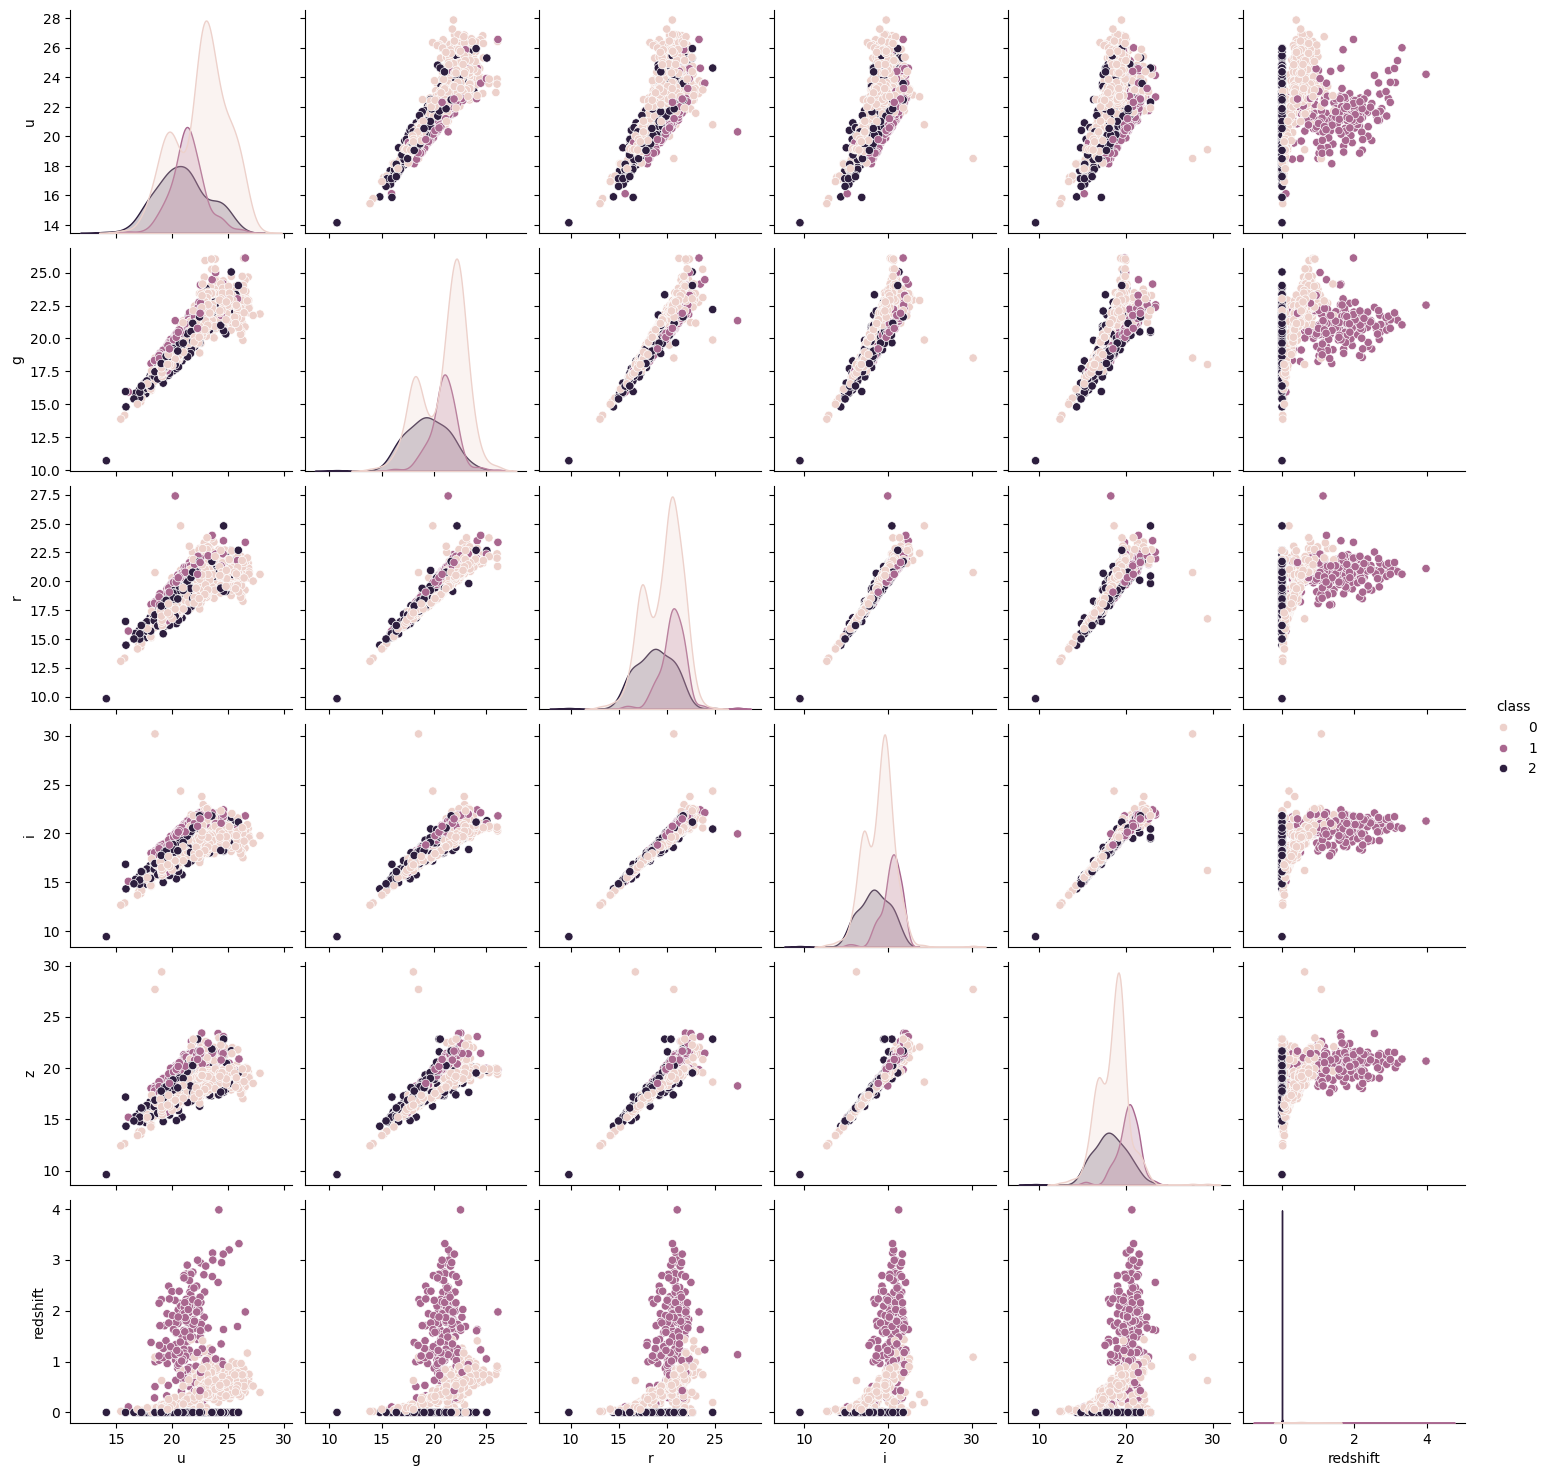

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting columns with continuous variables
cols = ['u', 'g', 'r', 'i', 'z', 'redshift']

# Pair plot
sns.pairplot(df[cols + ['class']].sample(1000), hue='class')
plt.show()

ECDF vs CDF graph for data exploration

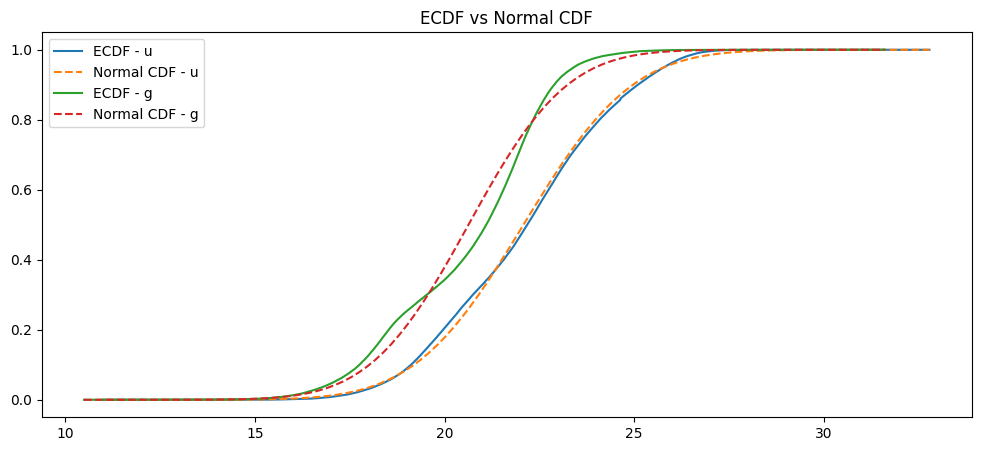

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import scipy.stats as stats

# Select two numeric columns (e.g., 'u' and 'g')
columns = ['u', 'g']

plt.figure(figsize=(12, 5))
for col in columns:
    # Compute ECDF
    ecdf = ECDF(df[col])
    plt.plot(ecdf.x, ecdf.y, label=f"ECDF - {col}")

    # Compute the theoretical normal CDF
    mean, std = df[col].mean(), df[col].std()
    x_vals = np.linspace(df[col].min(), df[col].max(), 100)
    normal_cdf = stats.norm.cdf(x_vals, mean, std)
    plt.plot(x_vals, normal_cdf, linestyle='--', label=f"Normal CDF - {col}")

plt.title("ECDF vs Normal CDF")
plt.legend()
plt.show()

Class distribution visualization

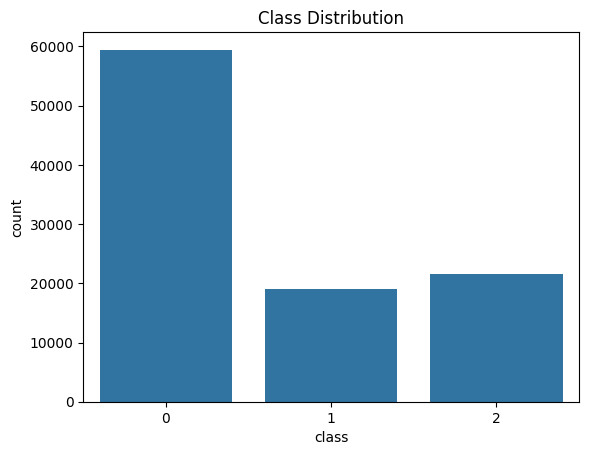

In [ ]:
sns.countplot(x='class', data=df)
plt.title("Class Distribution")
plt.show()

Resampling of dataset so that all the classes are balanced

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 30, k_neighbors = 5)
X_res, y_res = sm.fit_resample(df[['u', 'g', 'r', 'i', 'z', 'redshift']], df['class'])

New class distribution

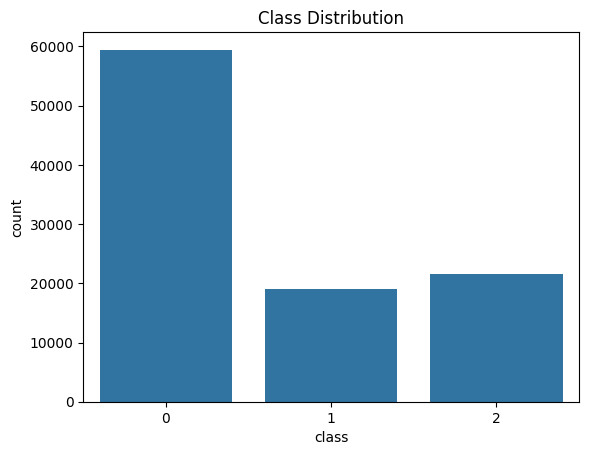

In [ ]:
sns.countplot(x='class', data=df)
plt.title("Class Distribution")
plt.show()

GridSearchCV for parameter optimization

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample  # For resampling

# Creates a subset of the data
X_subset, y_subset = resample(X_res, y_res, n_samples=40000, random_state=42)

# Splits the subset into training and testing sets
x_train_subset, x_test_subset, y_train_subset, y_test_subset = train_test_split(
    X_subset, y_subset, test_size=0.30, random_state=30
)

# Defines models and parameter grids
models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {"C": [0.1, 1, 10], "penalty": ["l2"]},
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {"n_neighbors": [1, 3, 5, 7, 9]},
    },
    "XGBoost": {
        "model": XGBClassifier(random_state=30),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.1],
            "max_depth": [3, 5],
        },
    },
    "Naive Bayes": {
        "model": GaussianNB(),
        "params": {},  # No hyperparameters to tune for GaussianNB
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=30),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 5, 10],
            "min_samples_split": [2, 5],
        },
    },
}

# Perform GridSearchCV for each model
for model_name, model_data in models.items():
    print(f"Performing GridSearchCV for {model_name}")
    grid_search = GridSearchCV(
        model_data["model"],
        model_data["params"],
        cv=5,  # 5-fold cross-validation
        scoring="accuracy",  # Use appropriate scoring metric
    )
    grid_search.fit(x_train_subset, y_train_subset)
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best score: {grid_search.best_score_}\n")

Performing GridSearchCV for Logistic Regression
Best parameters: {'C': 10, 'penalty': 'l2'}
Best score: 0.9511428571428573

Performing GridSearchCV for KNN
Best parameters: {'n_neighbors': 1}
Best score: 0.95325

Performing GridSearchCV for XGBoost
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best score: 0.9753214285714286

Performing GridSearchCV for Naive Bayes
Best parameters: {}
Best score: 0.9179999999999999

Performing GridSearchCV for Random Forest
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.9775



Splitting the dataset into training variables

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state = 30)


Pandas dataframe for visualization

In [ ]:
score_df = pd.DataFrame(columns=['Algorithm', 'Recall', 'Accuracy', 'AUC', 'Best Hyperparameters', 'Classification Report', 'Confusion Matrix'])
score_df

,Algorithm,Recall,Accuracy,AUC,Best Hyperparameters,Classification Report,Confusion Matrix


Logistic Regression model code

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score, roc_curve, auc, classification_report, confusion_matrix

model_LR = LogisticRegression(max_iter=1000, C=10, penalty= 'l2')
model_LR.fit(x_train, y_train)
y_pred_LR = model_LR.predict(x_test)
LR_score = recall_score(y_test, y_pred_LR, average='weighted')
accuracy_LR = accuracy_score(y_test, y_pred_LR)

fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, model_LR.predict_proba(x_test)[:, 1], pos_label=1)
roc_auc_LR = auc(fpr_LR, tpr_LR)

conf_matrix_LR = confusion_matrix(y_test, y_pred_LR)
print(LR_score)

0.9532719014597858


Inputs Logistic Regression results and model into the pandas dataframe

In [ ]:
new_row = pd.DataFrame([{'Algorithm': 'Logistic Regression', 'Recall': LR_score, 'Accuracy': accuracy_LR, 'AUC': roc_auc_LR, 'Best Hyperparameters': 'N/A', 'Classification Report': classification_report(y_test, y_pred_LR), 'Confusion Matrix': conf_matrix_LR}])
score_df = pd.concat([score_df, new_row], ignore_index=True)
score_df

<ipython-input-40-aeac1c5ff59a>:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  score_df = pd.concat([score_df, new_row], ignore_index=True)


,Algorithm,Recall,Accuracy,AUC,Best Hyperparameters,Classification Report,Confusion Matrix
0,Logistic Regression,0.953272,0.953272,0.99005,N/A,precision recall f1-score ...,"[[16739, 811, 296], [1389, 16463, 3], [0, 1, 1..."


KNN model code

In [ ]:
# KNN algo for highest performing neighbor = 1

from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier(n_neighbors = 1)
model_KNN.fit(x_train, y_train)
y_pred_KNN = model_KNN.predict(x_test)

KNN_score = recall_score(y_test, y_pred_KNN, average='weighted')
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)

fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, model_KNN.predict_proba(x_test)[:, 1], pos_label=1)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)

conf_matrix_KNN = confusion_matrix(y_test, y_pred_KNN)  # Calculate CM

print(KNN_score)

0.9719631408758714


Inputs KNN results and model into the pandas dataframe

In [ ]:
new_row = pd.DataFrame([{'Algorithm': 'KNN', 'Recall': KNN_score, 'Accuracy': accuracy_KNN, 'AUC': roc_auc_KNN, 'Best Hyperparameters': 'n_neighbors=1', 'Classification Report': classification_report(y_test, y_pred_KNN), 'Confusion Matrix': conf_matrix_KNN}])
score_df = pd.concat([score_df, new_row], ignore_index=True)
score_df

,Algorithm,Recall,Accuracy,AUC,Best Hyperparameters,Classification Report,Confusion Matrix
0,Logistic Regression,0.953272,0.953272,0.990050,N/A,precision recall f1-score ...,"[[16739, 811, 296], [1389, 16463, 3], [0, 1, 1..."
1,KNN,0.971963,0.971963,0.984513,n_neighbors=1,precision recall f1-score ...,"[[16718, 605, 523], [226, 17611, 18], [116, 12..."


XGBoost model code

In [ ]:
from xgboost import XGBClassifier

# XGBoost classifier
model_XGB = XGBClassifier(learning_rate =0.1, max_depth=5, n_estimators=200, random_state=30)
model_XGB.fit(x_train, y_train)
y_pred_XGB = model_XGB.predict(x_test)

XGB_score = recall_score(y_test, y_pred_XGB, average='weighted')
accuracy_XGB = accuracy_score(y_test, y_pred_XGB)

fpr_XGB, tpr_XGB, thresholds_XGB = roc_curve(y_test, model_XGB.predict_proba(x_test)[:, 1], pos_label=1)
roc_auc_XGB = auc(fpr_XGB, tpr_XGB)

conf_matrix_XGB = confusion_matrix(y_test, y_pred_XGB)

print(XGB_score)

0.9734584400291584


Inputs XGBoost results and model into the pandas dataframe

In [ ]:
new_row = pd.DataFrame([{'Algorithm': 'XGBoost', 'Recall': XGB_score, 'Accuracy': accuracy_XGB, 'AUC': roc_auc_XGB, 'Best Hyperparameters': 'criterion=entropy, random_state=30', 'Classification Report': classification_report(y_test, y_pred_XGB), 'Confusion Matrix': conf_matrix_XGB}])
score_df = pd.concat([score_df, new_row], ignore_index=True)
score_df

,Algorithm,Recall,Accuracy,AUC,Best Hyperparameters,Classification Report,Confusion Matrix
0,Logistic Regression,0.953272,0.953272,0.990050,N/A,precision recall f1-score ...,"[[16739, 811, 296], [1389, 16463, 3], [0, 1, 1..."
1,KNN,0.971963,0.971963,0.984513,n_neighbors=1,precision recall f1-score ...,"[[16718, 605, 523], [226, 17611, 18], [116, 12..."
2,XGBoost,0.973458,0.973458,0.996523,"criterion=entropy, random_state=30",precision recall f1-score ...,"[[17270, 481, 95], [808, 17046, 1], [35, 0, 17..."


Naive Bayes model code

In [ ]:
from sklearn.naive_bayes import GaussianNB


model_NB = GaussianNB()
model_NB.fit(x_train, y_train)
y_pred_NB = model_NB.predict(x_test)

NB_score = recall_score(y_test, y_pred_NB, average='weighted')
accuracy_NB = accuracy_score(y_test, y_pred_NB)

fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test, model_NB.predict_proba(x_test)[:, 1], pos_label=1)
roc_auc_NB = auc(fpr_NB, tpr_NB)

conf_matrix_NB = confusion_matrix(y_test, y_pred_NB)  # Calculate CM

NB_score

0.9200201865385693

Inputs Naive Bayes results and model into the pandas dataframe

In [ ]:
new_row = pd.DataFrame([{'Algorithm': 'Naive Bayes', 'Recall': NB_score, 'Accuracy': accuracy_NB, 'AUC': roc_auc_NB, 'Best Hyperparameters': 'N/A', 'Classification Report': classification_report(y_test, y_pred_NB), 'Confusion Matrix': conf_matrix_NB}])
score_df = pd.concat([score_df, new_row], ignore_index=True)
score_df

,Algorithm,Recall,Accuracy,AUC,Best Hyperparameters,Classification Report,Confusion Matrix
0,Logistic Regression,0.953272,0.953272,0.990050,N/A,precision recall f1-score ...,"[[16739, 811, 296], [1389, 16463, 3], [0, 1, 1..."
1,KNN,0.971963,0.971963,0.984513,n_neighbors=1,precision recall f1-score ...,"[[16718, 605, 523], [226, 17611, 18], [116, 12..."
2,XGBoost,0.973458,0.973458,0.996523,"criterion=entropy, random_state=30",precision recall f1-score ...,"[[17270, 481, 95], [808, 17046, 1], [35, 0, 17..."
3,Naive Bayes,0.920020,0.920020,0.968588,N/A,precision recall f1-score ...,"[[15292, 2416, 138], [1567, 16288, 0], [46, 11..."


Random Forest model code

In [ ]:
from sklearn.ensemble import RandomForestClassifier


model_RF = RandomForestClassifier(max_depth= None, min_samples_split= 2, n_estimators=100, random_state=30)  # You can adjust hyperparameters like n_estimators
model_RF.fit(x_train, y_train)
# Make predictions
y_pred_RF = model_RF.predict(x_test)

# Evaluate the model
RF_score = recall_score(y_test, y_pred_RF, average='weighted')
accuracy_RF = accuracy_score(y_test, y_pred_RF)
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, model_RF.predict_proba(x_test)[:, 1], pos_label=1)
roc_auc_RF = auc(fpr_RF, tpr_RF)

conf_matrix_RF = confusion_matrix(y_test, y_pred_RF)  # Calculate CM

RF_score

0.9813835255415787

Inputs Random Forest results and model into the pandas dataframe

In [ ]:
new_row = pd.DataFrame([{'Algorithm': 'Random Forest', 'Recall': RF_score, 'Accuracy': accuracy_RF, 'AUC': roc_auc_RF, 'Best Hyperparameters': 'n_estimators=100, random_state=30', 'Classification Report': classification_report(y_test, y_pred_RF), 'Confusion Matrix': conf_matrix_RF}])
score_df = pd.concat([score_df, new_row], ignore_index=True)

score_df

,Algorithm,Recall,Accuracy,AUC,Best Hyperparameters,Classification Report,Confusion Matrix
0,Logistic Regression,0.953272,0.953272,0.990050,N/A,precision recall f1-score ...,"[[16739, 811, 296], [1389, 16463, 3], [0, 1, 1..."
1,KNN,0.971963,0.971963,0.984513,n_neighbors=1,precision recall f1-score ...,"[[16718, 605, 523], [226, 17611, 18], [116, 12..."
2,XGBoost,0.973458,0.973458,0.996523,"criterion=entropy, random_state=30",precision recall f1-score ...,"[[17270, 481, 95], [808, 17046, 1], [35, 0, 17..."
3,Naive Bayes,0.920020,0.920020,0.968588,N/A,precision recall f1-score ...,"[[15292, 2416, 138], [1567, 16288, 0], [46, 11..."
4,Random Forest,0.981384,0.981384,0.997382,"n_estimators=100, random_state=30",precision recall f1-score ...,"[[17438, 382, 26], [587, 17268, 0], [1, 0, 177..."


Prints out classification reports and confusion matrices for all 5 models


--- Confusion Matrices & Classification Reports ---


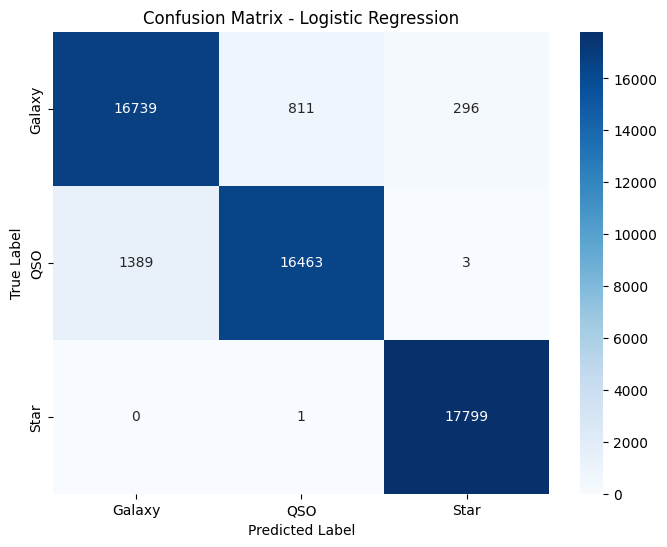

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     17846
           1       0.95      0.92      0.94     17855
           2       0.98      1.00      0.99     17800

    accuracy                           0.95     53501
   macro avg       0.95      0.95      0.95     53501
weighted avg       0.95      0.95      0.95     53501



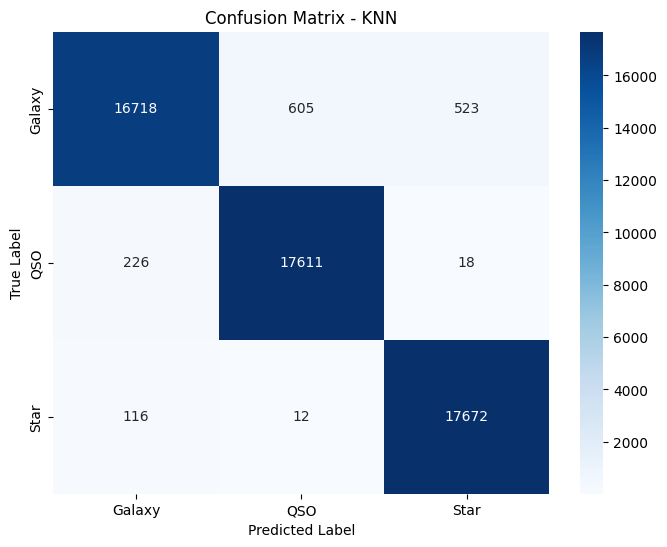

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     17846
           1       0.97      0.99      0.98     17855
           2       0.97      0.99      0.98     17800

    accuracy                           0.97     53501
   macro avg       0.97      0.97      0.97     53501
weighted avg       0.97      0.97      0.97     53501



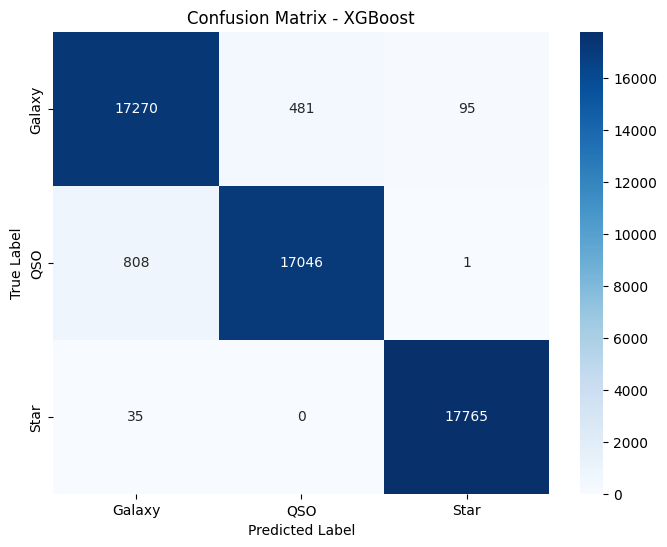

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     17846
           1       0.97      0.95      0.96     17855
           2       0.99      1.00      1.00     17800

    accuracy                           0.97     53501
   macro avg       0.97      0.97      0.97     53501
weighted avg       0.97      0.97      0.97     53501



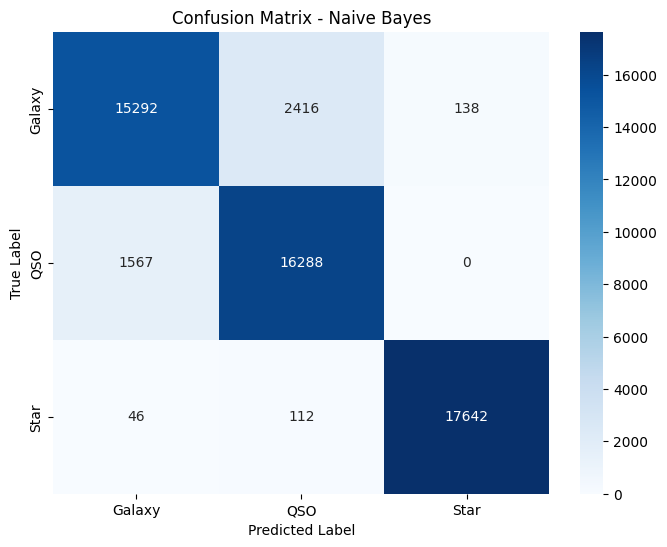

              precision    recall  f1-score   support

           0       0.90      0.86      0.88     17846
           1       0.87      0.91      0.89     17855
           2       0.99      0.99      0.99     17800

    accuracy                           0.92     53501
   macro avg       0.92      0.92      0.92     53501
weighted avg       0.92      0.92      0.92     53501



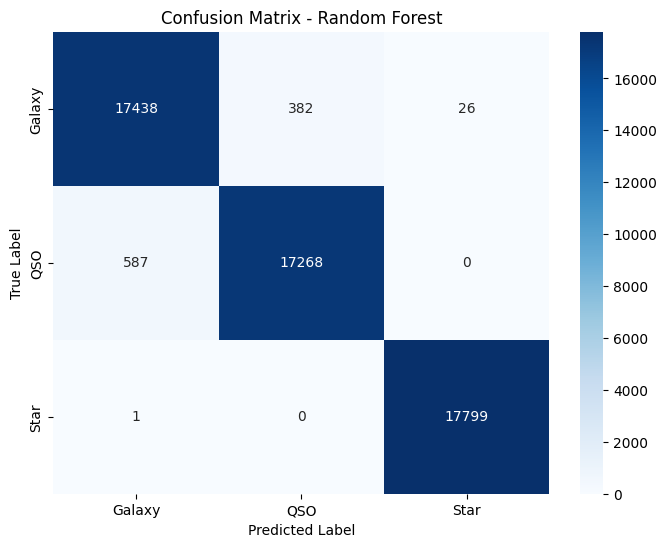

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     17846
           1       0.98      0.97      0.97     17855
           2       1.00      1.00      1.00     17800

    accuracy                           0.98     53501
   macro avg       0.98      0.98      0.98     53501
weighted avg       0.98      0.98      0.98     53501



In [ ]:
print("\n--- Confusion Matrices & Classification Reports ---")
for index, row in score_df.iterrows():
    # Get confusion matrix and model name
    conf_matrix = row["Confusion Matrix"]
    model_name = row['Algorithm']

    # Create heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Galaxy', 'QSO', 'Star'],
                yticklabels=['Galaxy', 'QSO', 'Star'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    print(row["Classification Report"])

Visualization of the comparison of all 5 models and their respective accuracies and recalls

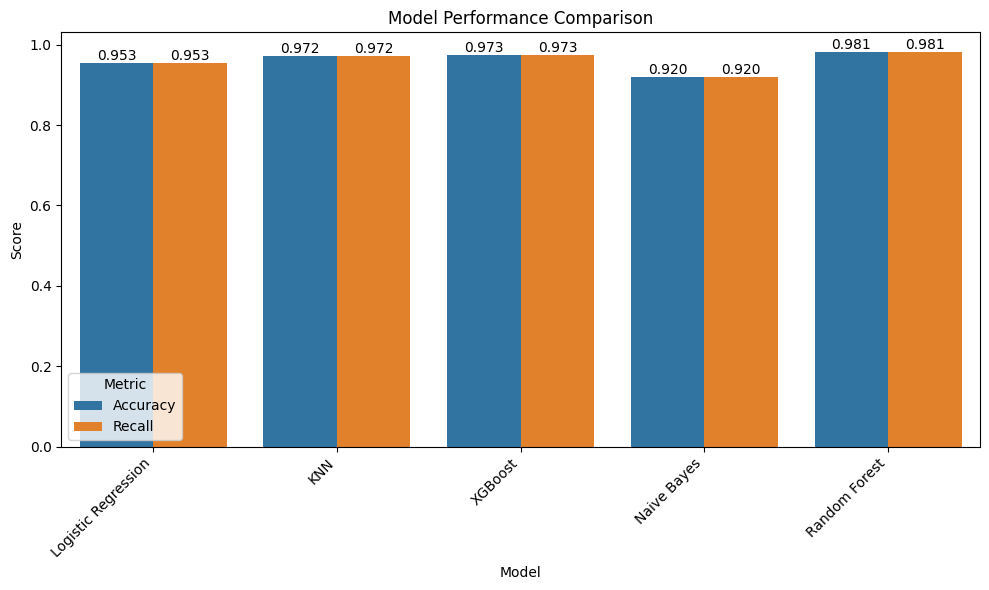

In [ ]:
melted_df = pd.melt(score_df, id_vars=['Algorithm'], value_vars=['Accuracy', 'Recall'], var_name='Metric', value_name='Score')

# Create the histogram
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Algorithm', y='Score', hue='Metric', data=melted_df)
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')

# Add data labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge')

plt.tight_layout()
plt.show()

Learning curve display code that determines the tradeoff between accuracy and sample size

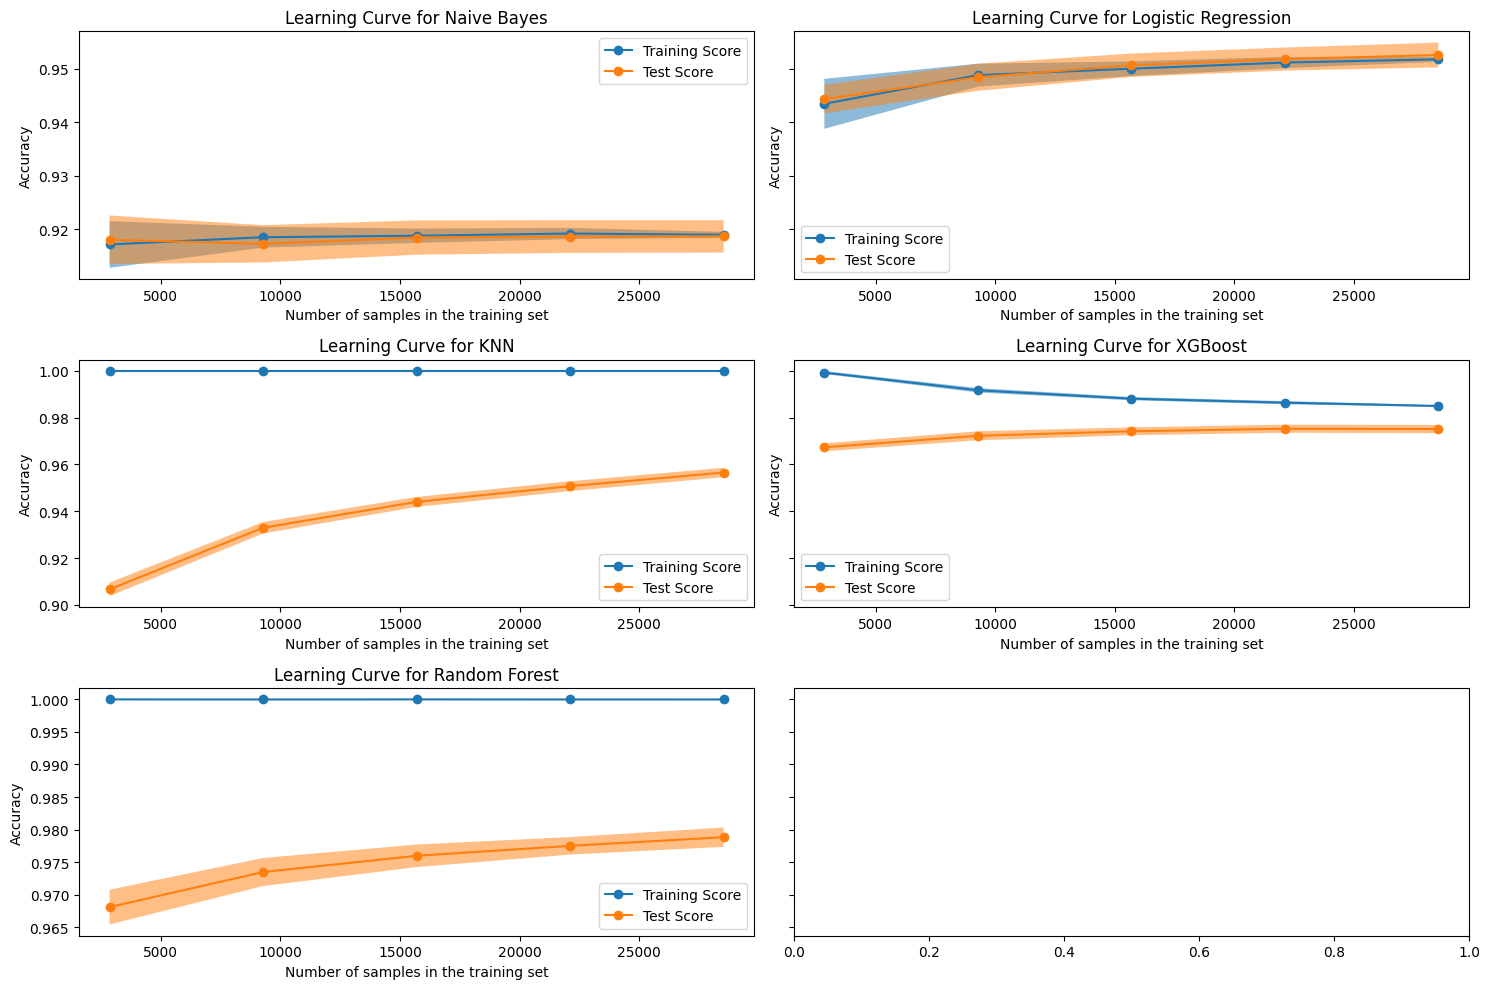

In [ ]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.utils import resample

# Create a subset of the data
X_subset, y_subset = resample(X_res, y_res, n_samples=int(0.2 * len(X_res)), random_state=42)

common_params = {
    "X": X_subset,
    "y": y_subset,
    "train_sizes": np.linspace(0.1, 1.0, 5),  # Training set sizes to evaluate
    "cv": ShuffleSplit(n_splits=10, test_size=0.2, random_state=0),  # Cross-validation strategy
    "score_type": "both",  # Get scores for both training and validation sets
    "n_jobs": 4,  # Number of CPU cores to use for parallel processing
    "line_kw": {"marker": "o"},  # Style for the lines in the plot
    "std_display_style": "fill_between",  # How to display standard deviation
    "score_name": "Accuracy",  # Metric to use for the y-axis
}

models = {
    "Naive Bayes": model_NB,
    "Logistic Regression": model_LR,
    "KNN": model_KNN,
    "XGBoost": model_XGB,
    "Random Forest": model_RF,
}

# Dynamically calculate rows needed
nrows = math.ceil(len(models) / 2)

fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 10), sharey="row")
axes = axes.flatten()  # Flatten for easy indexing

for ax_idx, (model_name, model) in enumerate(models.items()):
    ax = axes[ax_idx]  # Flattened indexing
    LearningCurveDisplay.from_estimator(model, **common_params, ax=ax)

    ax.legend(["Training Score", "Test Score"])
    ax.set_title(f"Learning Curve for {model_name}")

plt.tight_layout()
plt.show()